In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


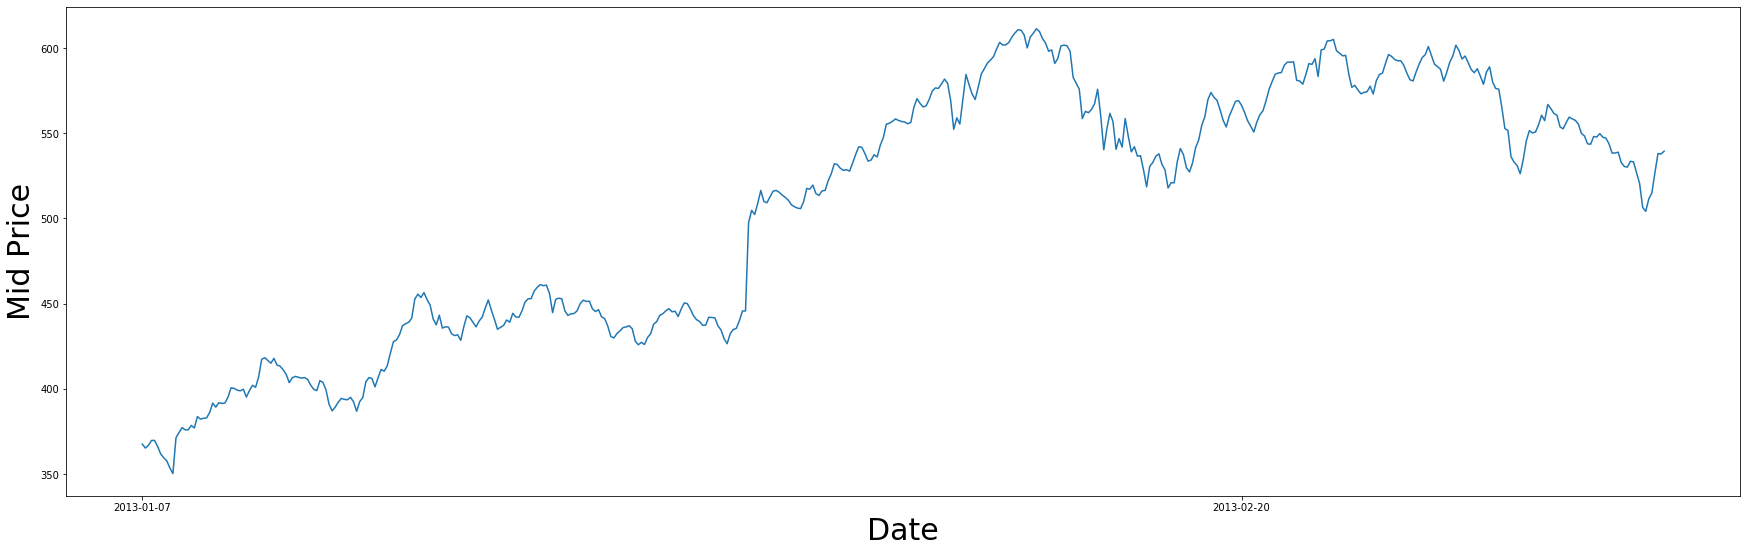

In [4]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [9]:
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

,Open,High,Low,Close
0,367.72,369.69,365.29,367.38
1,367.77,368.15,362.22,366.65
2,366.50,369.18,364.30,369.06
3,371.42,372.50,366.75,370.74
4,371.00,371.22,368.15,370.00


In [7]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=validation_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=testing_data.columns,
              dtype='float64')

training_data_scaled

,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...
295,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


In [17]:
import itertools

def discrete_frac_range():

        # increment : 0.01
        # fracchange : from -0.1 to 0.1, total 20 points
        # frachigh : from 0 to 0.1, total 10 points
        # fraclow : from 0 to 0.1, total 10 points

        frac_change_list = np.linspace(-0.1, 0.1, 20)
        frac_high_list = np.linspace(0, 0.1, 10)
        frac_low_list = np.linspace(0, 0.1, 10)
        
        return np.array(list(itertools.product(\
                    frac_change_list, frac_high_list, frac_low_list))) 
    
all_discrete_fracs = discrete_frac_range()
all_discrete_fracs

array([[-0.1       ,  0.        ,  0.        ],
       [-0.1       ,  0.        ,  0.01111111],
       [-0.1       ,  0.        ,  0.02222222],
       ...,
       [ 0.1       ,  0.1       ,  0.07777778],
       [ 0.1       ,  0.1       ,  0.08888889],
       [ 0.1       ,  0.1       ,  0.1       ]])

In [22]:
def fraction_calculator(data):

        open = np.array(data['Open'])
        close = np.array(data['Close'])
        high = np.array(data['High'])
        low = np.array(data['Low'])

        frac_change = (close - open) / open
        frac_high = (high - open) / open
        frac_low = (open - low) / open

        return np.column_stack((frac_change, frac_high, frac_low))

example_frac = fraction_calculator(df.head())
example_frac

array([[-0.00092462,  0.00535734,  0.00660829],
       [-0.00304538,  0.00103325,  0.01509095],
       [ 0.00698499,  0.00731241,  0.00600273],
       [-0.00183081,  0.00290776,  0.01257337],
       [-0.00269542,  0.00059299,  0.00768194]])

In [95]:
from hmmlearn.hmm import GaussianHMM

hmm = GaussianHMM(n_components=4)
frac_vector = fraction_calculator(training_data)
hmm.fit(frac_vector)

frac_vector

array([[-9.24616556e-04,  5.35733710e-03,  6.60828892e-03],
       [-3.04538162e-03,  1.03325448e-03,  1.50909536e-02],
       [ 6.98499318e-03,  7.31241473e-03,  6.00272851e-03],
       [-1.83081148e-03,  2.90775941e-03,  1.25733671e-02],
       [-2.69541779e-03,  5.92991914e-04,  7.68194070e-03],
       [-1.87235428e-02,  7.00097688e-03,  1.99175079e-02],
       [ 7.78513040e-03,  2.17983651e-02,  1.00372574e-02],
       [-9.96677741e-03,  2.68549280e-03,  1.20708749e-02],
       [-8.91712646e-03,  2.67513794e-03,  9.33511676e-03],
       [-8.22118363e-03,  3.37856861e-03,  1.27259418e-02],
       [-2.52604093e-03,  9.65004399e-04,  1.29707944e-02],
       [ 7.47282609e-03,  1.76630435e-02,  2.71739130e-04],
       [ 1.69985430e-02,  2.10458151e-02,  9.71345313e-04],
       [ 3.88939208e-03,  1.02829133e-02,  6.92631467e-04],
       [-1.38342024e-03,  5.10801320e-03,  5.16122167e-03],
       [ 9.26669881e-03,  1.36590069e-02,  2.94606031e-04],
       [ 1.32671744e-04,  9.57889989e-03

In [28]:
def most_likely_fracs(curr_date, hmm, all_discrete_fracs, testing_data):

        start_date = max(0, curr_date - 10)
        end_date = max(0, curr_date - 1)

        previous_data = testing_data.iloc[end_date: start_date]
        previous_fracs = fraction_calculator(previous_data)

        all_probs = []
        for one_fracs in all_discrete_fracs:
            one_outcome = np.row_stack((previous_fracs, one_fracs))
            all_probs.append(hmm.score(one_outcome))

        max_prob = all_discrete_fracs[np.argmax(all_probs)]

        return max_prob

ex_likely_frac = most_likely_fracs(20, hmm, all_discrete_fracs, testing_data)
ex_likely_frac

array([0.00526316, 0.01111111, 0.01111111])

In [42]:
def close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs):
                         
        open = testing_data.iloc[date]['Open']                   
        likely_frac_change, _, _ = most_likely_fracs(date, hmm, all_discrete_fracs, testing_data)     
        close = open * (1 + likely_frac_change)
        return close, (open + close) / 2

calc_close_price, calc_middle_price = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
calc_close_price, calc_middle_price

(602.2933684210526, 600.7166842105263)

In [78]:
def closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs):

        # for all rows in testing data
        closing_prices = []
        middle_prices = []
        #calc_close_price, calc_middle_price = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
        for date in range(testing_data.shape[0]):
            close, middle = close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
            closing_prices.append(close)
            middle_prices.append(middle)
        
        return closing_prices, middle_prices
  
_, mid_price_train = closing_and_middle_price_in_range(training_data, most_likely_fracs, hmm, all_discrete_fracs)
_, mid_price_validate = closing_and_middle_price_in_range(validation_data, most_likely_fracs, hmm, all_discrete_fracs)
_, mid_price_test = closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs)
mid_price_train, mid_price_validate, mid_price_test

([368.68768421052636,
  368.73781578947364,
  367.46447368421053,
  372.39742105263156,
  371.9763157894737,
  369.4897894736842,
  360.6064736842105,
  362.1505263157895,
  359.8043684210527,
  356.1146842105263,
  353.2571842105263,
  368.9684210526316,
  371.5953157894737,
  376.36784210526315,
  376.8691578947369,
  374.36257894736843,
  377.86176315789476,
  376.24752631578946,
  380.09763157894736,
  384.85010526315784,
  381.56147368421057,
  380.53878947368423,
  385.86276315789473,
  391.08647368421055,
  390.2242105263158,
  391.6078421052631,
  391.08647368421055,
  390.88594736842106,
  394.7360526315789,
  399.0473684210526,
  403.70960526315787,
  400.05,
  400.6816578947369,
  402.2056578947368,
  398.54605263157896,
  398.44578947368416,
  401.6040789473684,
  399.98984210526316,
  403.70960526315787,
  415.59078947368425,
  421.62663157894735,
  418.12744736842103,
  418.34802631578947,
  416.93431578947366,
  416.453052631579,
  415.03934210526313,
  414.1670526315789

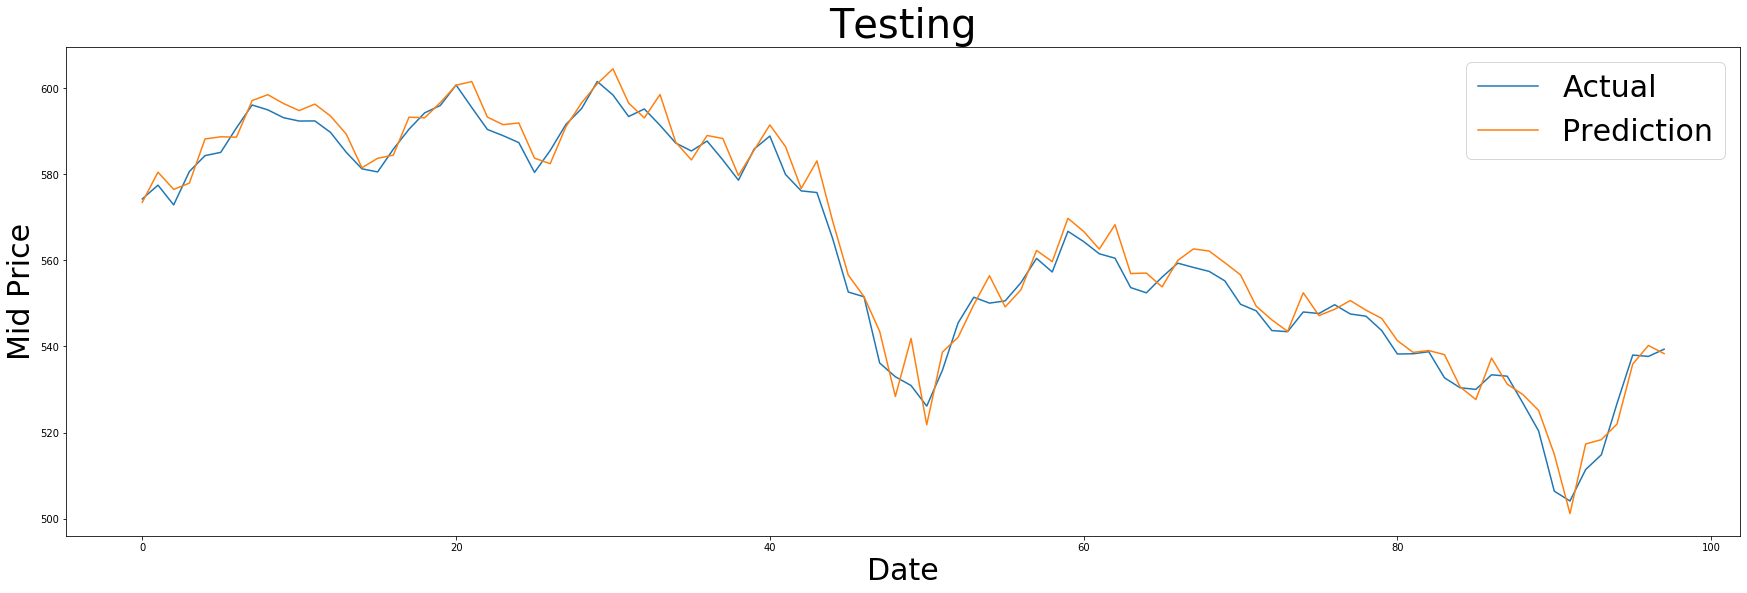

In [76]:
plt.figure(figsize = (30,9))
plt.plot(range(testing_data.shape[0]), testing_data['Middle'], label='Actual')
plt.plot(range(testing_data.shape[0]), mid_price_test, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Testing", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()

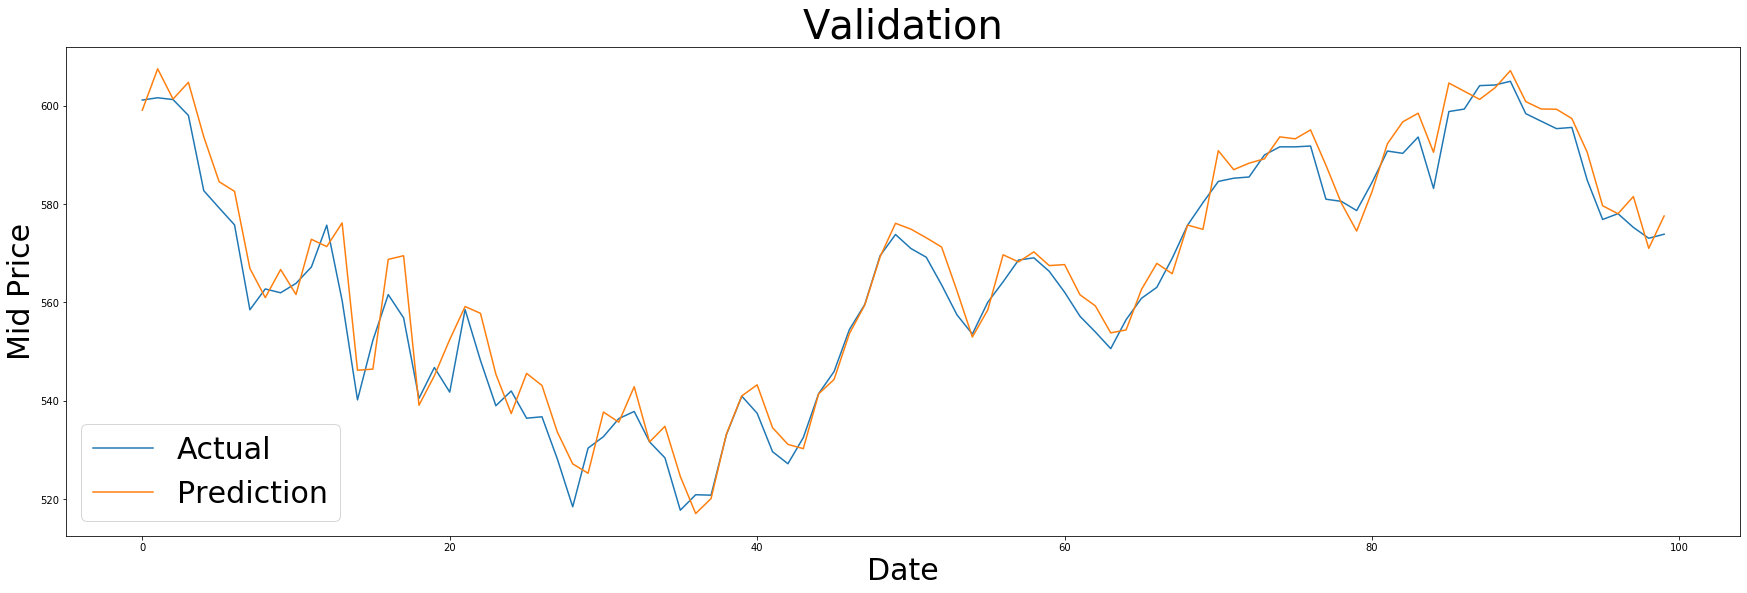

In [77]:
plt.figure(figsize = (30,9))
plt.plot(range(validation_data.shape[0]), validation_data['Middle'], label='Actual')
plt.plot(range(validation_data.shape[0]), mid_price_validate, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Validation", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()

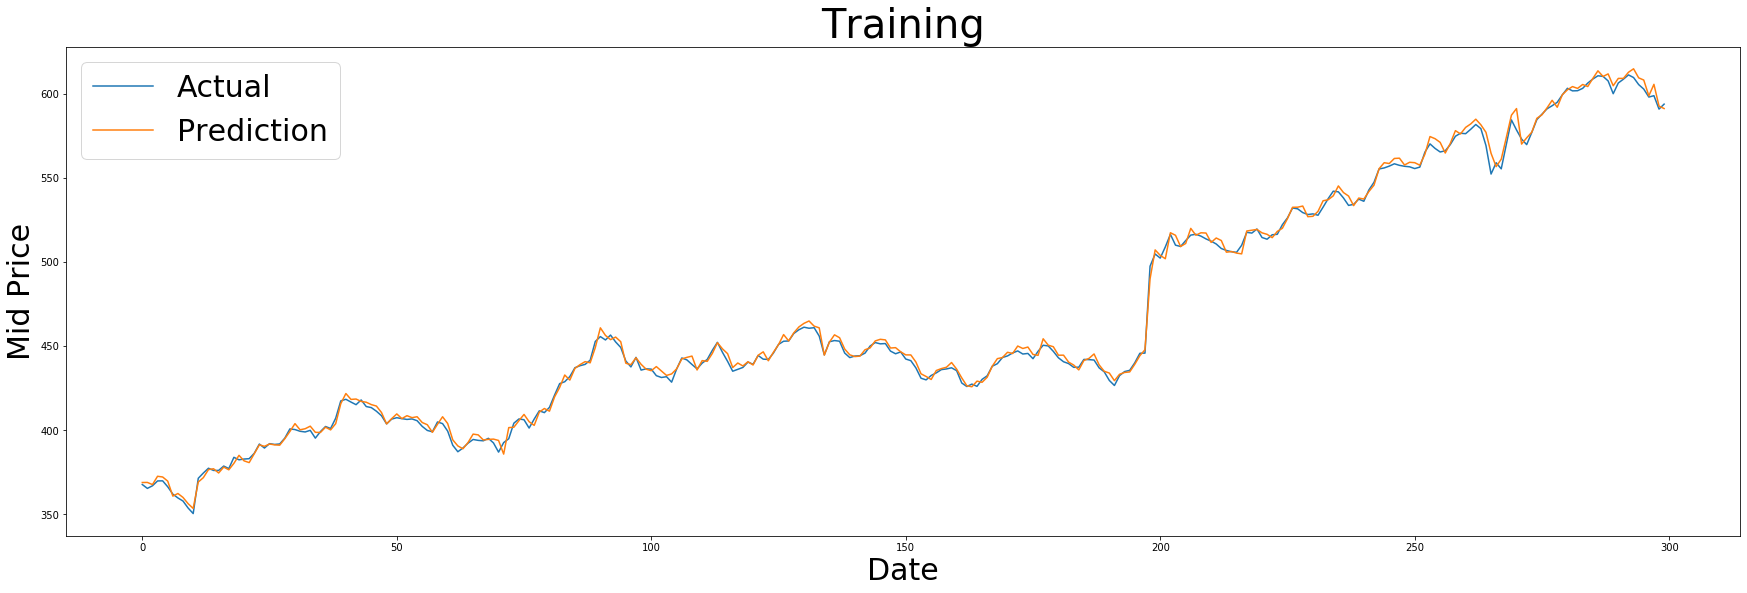

In [79]:
plt.figure(figsize = (30,9))
plt.plot(range(training_data.shape[0]), training_data['Middle'], label='Actual')
plt.plot(range(training_data.shape[0]), mid_price_train, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Training", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()

In [99]:
df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


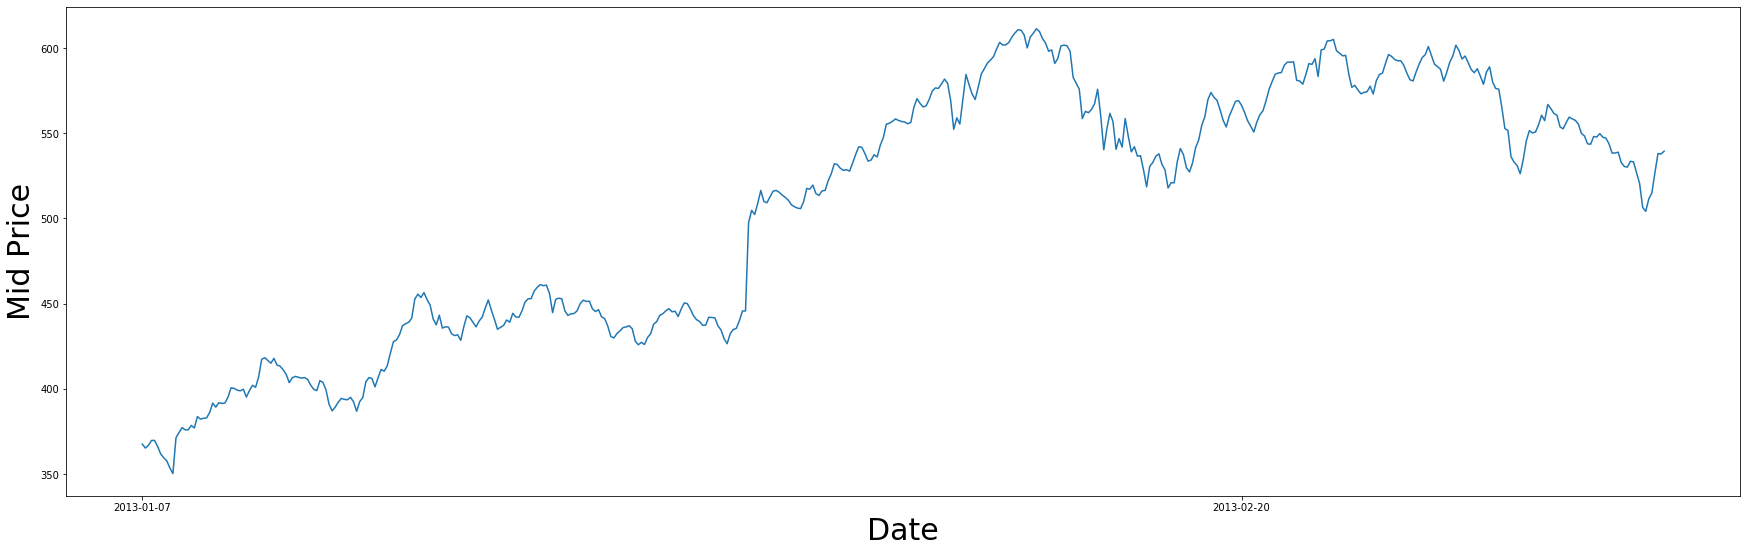

In [100]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [101]:
df = df.drop(['Date'], axis=1)

In [102]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=validation_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=testing_data.columns,
              dtype='float64')

training_data_scaled

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.543153,0.227605,0.197980,0.199553,0.787121,0.265384,0.801997,0.838543,1.000000,0.286567,...,0.591883,0.529864,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.446970,0.512821,0.103237,0.000000,0.710903,0.404290,0.518249,0.697056,0.798920,0.219626,...,0.642715,0.143875,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.723187,0.601772,0.193135,0.132849,0.358002,0.290855,0.648240,0.538887,0.696144,0.198793,...,0.882067,0.437738,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.670455,0.588942,0.464567,0.049265,0.361019,0.129950,0.593227,0.645117,0.739473,0.433560,...,0.906167,0.110753,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.525847,0.405354,0.088055,0.231834,0.548166,0.378470,0.803652,0.744541,0.536400,0.377849,...,0.591947,0.581366,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.259531,0.434243,0.144865,0.190702,0.369681,0.602523,0.449170,0.183346,0.356334,0.670336,...,0.479048,0.570092,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.175857,0.502837,0.555957,0.129219,0.217357,0.656143,0.493522,0.186564,0.352439,0.599635,...,0.498946,0.382707,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.167614,0.417668,0.377461,0.184743,0.324403,0.582611,0.363386,0.105685,0.190029,0.425558,...,0.716110,0.193989,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.000000,0.190422,0.452421,0.231834,0.126965,0.430111,0.536312,0.256711,0.165015,0.429428,...,0.562241,0.822544,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


In [147]:
def discrete_frac_range():

        # increment : 0.01
        # fracchange : from -0.1 to 0.1, total 20 points
        # frachigh : from 0 to 0.1, total 10 points
        # fraclow : from 0 to 0.1, total 10 points

        #frac_change_list = np.linspace(-0.1, 0.1, 20)
        frac_high_list = np.linspace(0, 0.1, 10)
        frac_low_list = np.linspace(0, 0.1, 10)
        frac_news = np.linspace(-0.1, 0.1, 20)
        
        
        return np.array(list(itertools.product(\
                    frac_news, frac_high_list, frac_low_list))) 
    
all_discrete_fracs = discrete_frac_range()
all_discrete_fracs

array([[-0.1       ,  0.        ,  0.        ],
       [-0.1       ,  0.        ,  0.01111111],
       [-0.1       ,  0.        ,  0.02222222],
       ...,
       [ 0.1       ,  0.1       ,  0.07777778],
       [ 0.1       ,  0.1       ,  0.08888889],
       [ 0.1       ,  0.1       ,  0.1       ]])

In [148]:
def fraction_calculator(data):

        open = np.array(data['Open'])
        close = np.array(data['Close'])
        high = np.array(data['High'])
        low = np.array(data['Low'])

        #frac_change = (close - open) / open
        frac_high = (high - open) / open
        frac_low = (open - low) / open
        frac_news = ((close - open) / open) * data['abs_title_sentiment_polarity']

        return np.column_stack((frac_news, frac_high, frac_low))

example_frac = fraction_calculator(df.head())
example_frac

array([[-0.00016348,  0.00535734,  0.00660829],
       [-0.000313  ,  0.00103325,  0.01509095],
       [ 0.00111159,  0.00731241,  0.00600273],
       [-0.00017654,  0.00290776,  0.01257337],
       [-0.0005032 ,  0.00059299,  0.00768194]])

In [149]:
hmm = GaussianHMM(n_components=4)
frac_vector = fraction_calculator(training_data)
hmm.fit(frac_vector)

GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=4, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [150]:
def most_likely_fracs(curr_date, hmm, all_discrete_fracs, testing_data):

        start_date = max(0, curr_date - 10)
        end_date = max(0, curr_date - 1)

        previous_data = testing_data.iloc[end_date: start_date]
        previous_fracs = fraction_calculator(previous_data)

        all_probs = []
        for one_fracs in all_discrete_fracs:
            one_outcome = np.row_stack((previous_fracs, one_fracs))
            all_probs.append(hmm.score(one_outcome))

        max_prob = all_discrete_fracs[np.argmax(all_probs)]

        return max_prob

ex_likely_frac = most_likely_fracs(20, hmm, all_discrete_fracs, testing_data)
ex_likely_frac

array([0.00526316, 0.01111111, 0.01111111])

In [151]:
def close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs):
                         
        open = testing_data.iloc[date]['Open']   
        news = testing_data.iloc[date]['abs_title_sentiment_polarity']
        likely_frac_news, _, _ = most_likely_fracs(date, hmm, all_discrete_fracs, testing_data)     
        #close = open * (1 + likely_frac_change)
        close_news = open * (1 + (likely_frac_news / news))
        return close_news, (open + close_news) / 2

calc_close_news, calc_middle_news = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
calc_close_news, calc_middle_news

(622.7430217936571, 610.9415108968285)

In [153]:
def closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs):

        # for all rows in testing data
        #closing_prices = []
        #middle_prices = []
        close_news_prices = []
        mid_news_prices = []
        #calc_close_price, calc_middle_price = close_price(20, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
        for date in range(testing_data.shape[0]):
            close_news, mid_news = close_price(date, testing_data, most_likely_fracs, hmm, all_discrete_fracs)
            #closing_prices.append(close)
            #middle_prices.append(middle)
            close_news_prices.append(close_news)
            mid_news_prices.append(mid_news)
        
        return close_news_prices, mid_news_prices
  
_, mid_price_train = closing_and_middle_price_in_range(training_data, most_likely_fracs, hmm, all_discrete_fracs)
_, mid_price_validate = closing_and_middle_price_in_range(validation_data, most_likely_fracs, hmm, all_discrete_fracs)
_, mid_price_test = closing_and_middle_price_in_range(testing_data, most_likely_fracs, hmm, all_discrete_fracs)
mid_price_train, mid_price_validate, mid_price_test

([373.1930694801425,
  377.18658605974645,
  372.5605723556639,
  381.55657384314907,
  376.2297161960517,
  374.64913977498657,
  366.1110803435549,
  368.74503996875995,
  368.47829699983265,
  360.75391462267305,
  357.93480167054986,
  375.3575798069811,
  377.0211778541721,
  381.51938814153243,
  381.2695725801337,
  378.97111354882975,
  383.4936634454873,
  380.3619883897956,
  383.89895554818025,
  389.46074677636386,
  385.9443589152103,
  387.3489640035658,
  392.70535797763546,
  399.6190967877545,
  395.76463399591864,
  396.58975115476676,
  396.57563136167045,
  395.8770185176683,
  399.4395424349352,
  403.707672775152,
  409.1614553949116,
  404.69821476470736,
  403.8742150319233,
  405.8373464428721,
  406.0928345213596,
  408.15708525722664,
  407.12656229807556,
  407.316250569509,
  408.66177911163845,
  423.6950859825182,
  429.3948793000353,
  424.91507556012743,
  425.27297351102555,
  423.05568192704277,
  423.6406282869176,
  419.7915329303871,
  419.77142599

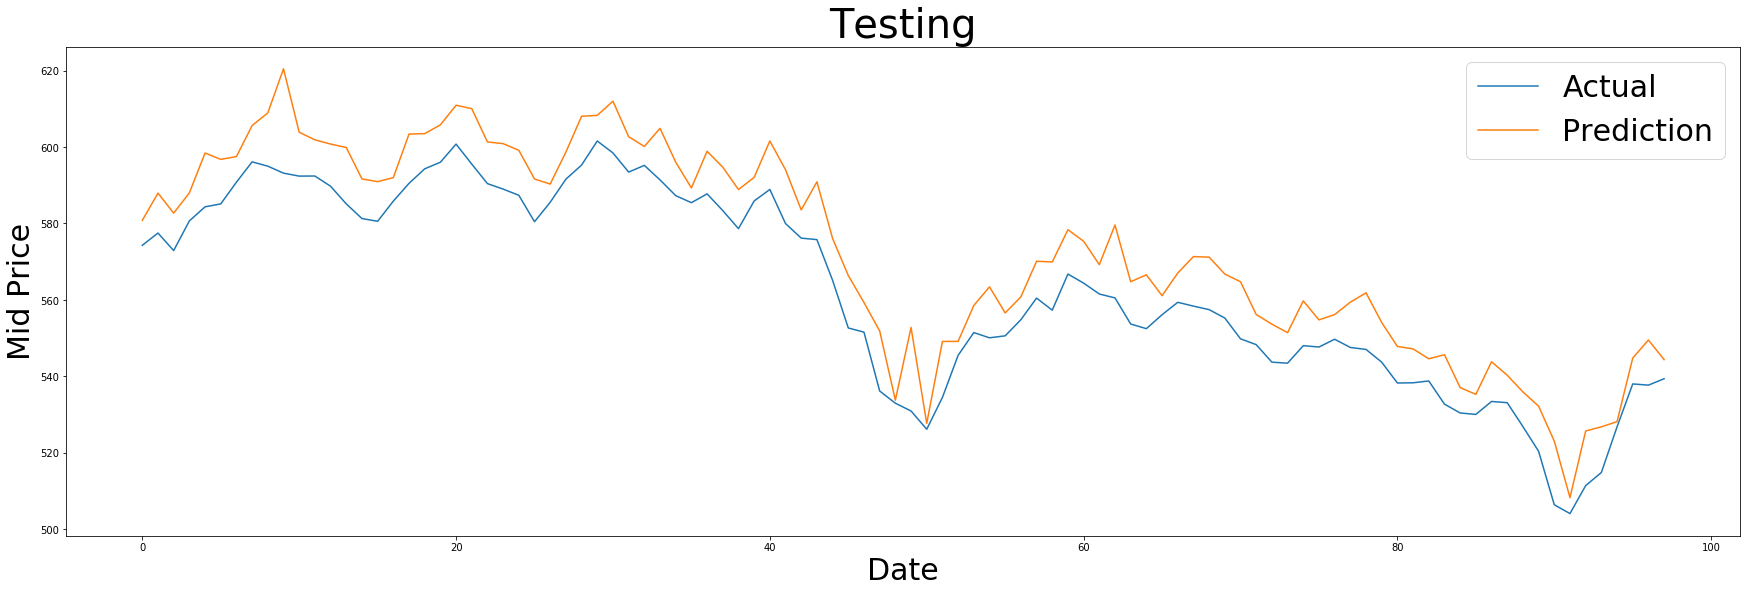

In [156]:
plt.figure(figsize = (30,9))
plt.plot(range(testing_data.shape[0]), testing_data['Middle'], label='Actual')
plt.plot(range(testing_data.shape[0]), mid_price_test, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Testing", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()

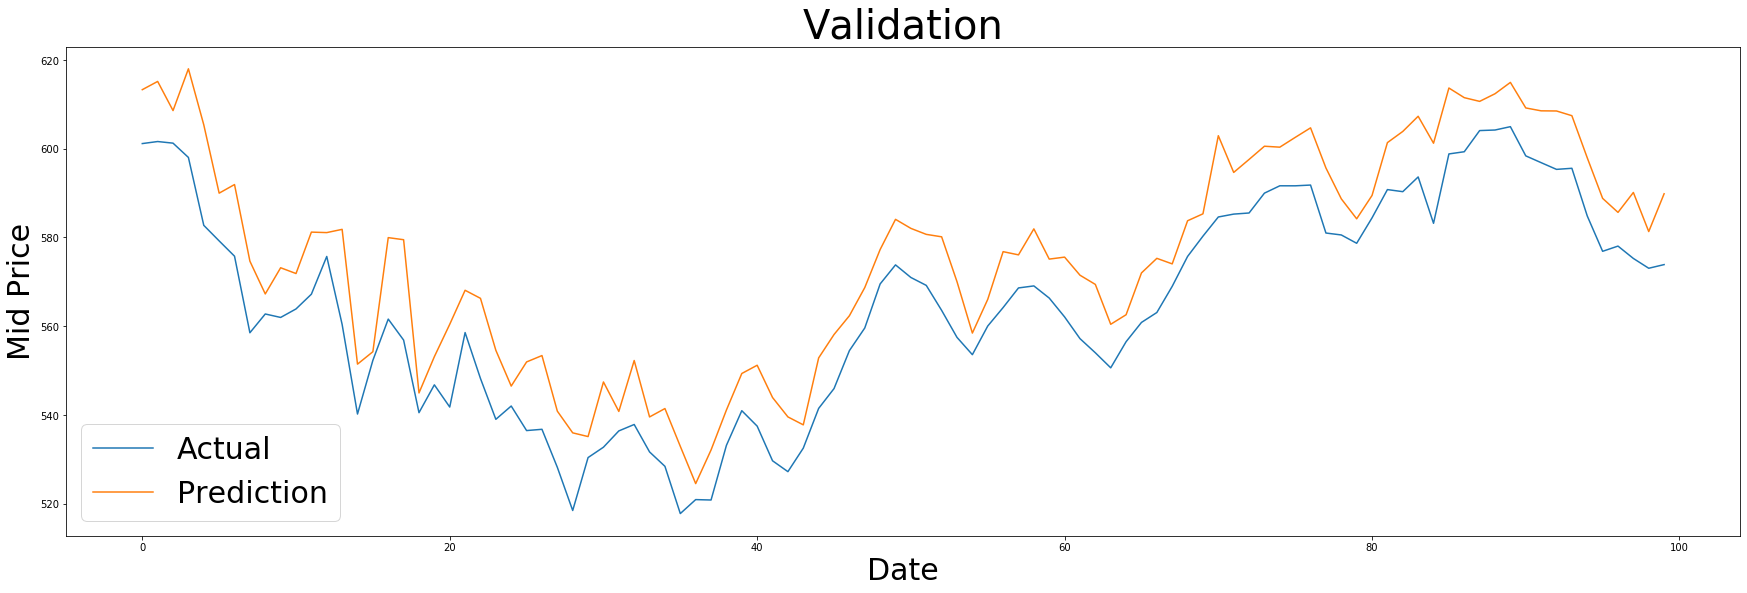

In [157]:
plt.figure(figsize = (30,9))
plt.plot(range(validation_data.shape[0]), validation_data['Middle'], label='Actual')
plt.plot(range(validation_data.shape[0]), mid_price_validate, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Validation", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()

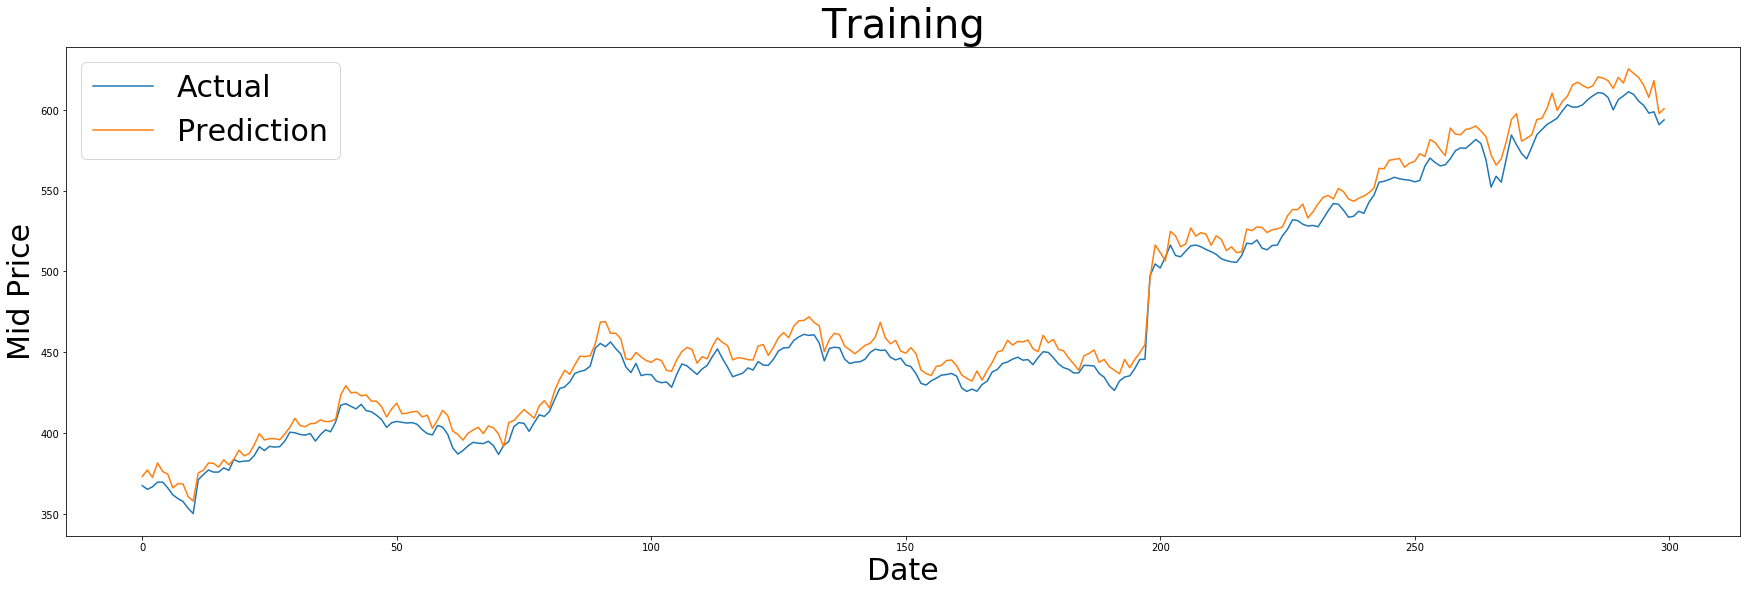

In [158]:
plt.figure(figsize = (30,9))
plt.plot(range(training_data.shape[0]), training_data['Middle'], label='Actual')
plt.plot(range(training_data.shape[0]), mid_price_train, label='Prediction')
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.title("Training", fontsize=40)
leg = plt.legend(prop={'size': 30})
plt.show()